# numpy and matplotlib

# Two major libraries:  numpy and matplotlib

Today we'll introduce you to two of the most important libraries for data science.  Numpy stands for "numerical python" and contains many tools essential for working with data.  matplotlib is named after its goal of having plotting tools as nice as matlab's.  We'll demonstrate some of the most essential tools here.

# Importing numpy and matplotlib

While we could just write "import numpy" and "import matplotlib," this would require us to type out "numpy" or "matplotlib" before every function call from these modules.  Instead, it's conventional to rename these modules or their libraries to conventional abbreviations, resulting in less typing.  The particular choice of abbreviation in each case helps with readability, since the name is a convention.  Thus:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

If we wanted just a particular function to import, we could write something like the following:

In [9]:
from numpy import mean as avg
avg([3,4,5])

4.0

# Numpy, vectors, and matrices

Vectors and matrices could be just represented as lists and lists of lists, respectively - but lists are all-purpose, and that means they're not particularly optimized for numerical tasks.  So while numpy expects you to define your vector as a list and your matrix as a list-of-lists, it then also expects you to convert either one to an *array* for efficiency.

Arrays are efficient because, under the hood, it's very easy to compute exactly where an item with a particular index is.  In a 2d 3x3 array of ints, for example, the data for element [1][1] is definitely 4 int-sized steps from the beginning of the array.  Lists-of-lists, on the other hand, could be more disorganized in memory, since they're not even required to have the same length of list each time.

Here is how to create 1D and 2D numpy arrays.

In [10]:
v = np.array([1,2,3])
A = np.array([[1,0,0],[0,2,0],[0,0,3]])

One thing that arrays can do but lists can't is called broadcasting.  When a number is added to a vector, it's added to all the elements of the vector.  The same thing goes for multiplication, raising to a power, and some other mathematical operations - they're applied element by element to the whole array.

In [13]:
print(v)
print(v + 1)
print(v * 2)
print(v ** 2)
v2 = np.array([1, 1, 1])
print(v+v2)

[1 2 3]
[2 3 4]
[2 4 6]
[1 4 9]
[2 3 4]


Another operation that is common in data science that numpy makes easy is matrix multiplication.  Matrix multiplication gets its own operator in numpy, @.  Matrix A has an effect of multiplying the second element of a vector by 2 and the third element by 3, and that's what happens when we use matrix multiplication here.

In [14]:
print(A)
print(v)
A @ v

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[1 2 3]


array([1, 4, 9])

Matrix-matrix multiplication is possible, too.

In [15]:
A @ A

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

It's very common to want to know the dimensions of an array of data - you may have just loaded the dataset without knowing how many rows of data are in it.  The shape attribute of an array (such as a matrix) is a tuple that tells you its dimensions.  (An attribute is like a function that takes no arguments, but tells you something about the object it's attached to.)

In [16]:
print(A.shape)
print(v.shape)

(3, 3)
(3,)


# Slicing

One very convenient thing that you can do with numpy arrays (which you can also do with lists and strings) is "slicing," or grabbing values between particular indices.  The syntax for a 1D array is my_array[first_included_index:first_excluded_index], so the second index isn't in the result.

In [17]:
my_array = np.array([8, 6, 7, 5, 3, 0])
print(my_array[1:3]) # prints index 1 and 2, not 3

[6 7]


Leaving off the second number means all the rest of the indices will be included.  Leaving off the first means all elements before the index after the colon will be included.

In [18]:
my_array = np.array([8, 6, 7, 5, 3, 0]) # Repeat for presentation
my_array[1:]

array([6, 7, 5, 3, 0])

In [ ]:
my_array [:3]

This all works in a similar way for the 2D case.

One detail is that the ranges are comma-separated.  (You might be tempted to use double-square-brackets if you thought of them as list-of-lists.)

In [19]:
my_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
two_by_two_square = my_matrix[1:,1:]
print(two_by_two_square)

[[5 6]
 [8 9]]


A colon alone refers to grabbing all rows or columns.

In [22]:
no_first_column = my_matrix[:,1:]
print(no_first_column)

[[2 3]
 [5 6]
 [8 9]]
[1, 2, 3]


Using slices is relatively common when dealing with datasets, because you may know that you only want the first 5 columns of data, for example; or you may want just the first 100 records to set aside for debugging.

# Useful matrix construction numpy methods

Two rather common things to need when dealing with matrices are a matrix that is all zeros, of a particular size, and a matrix of all ones, also of a particular size.  In both cases, the first argument is a tuple with the shape.  This has the somewhat odd effect of making these function calls have double parentheses.

In [23]:
print(np.zeros((2,3))) # shape is a single argument, a pair tuple

[[0. 0. 0.]
 [0. 0. 0.]]


In [24]:
print(np.ones((2,3))) 

[[1. 1. 1.]
 [1. 1. 1.]]


Other times, you need to glue two different matrices together.  np.concatenate() will do this gluing.  Its first argument is a tuple containing all the arrays to glue.  Its second argument determines the axis of gluing: 0 for stacking matrices on top of each other, 1 for gluing left to right.  It's 0 by default.

In [4]:
np.concatenate((np.zeros((2,3)),(np.ones((1,3)))))

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]])

In [5]:
np.concatenate((np.zeros((2,3)),(np.ones((2,1)))),1)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.]])

Sometimes, you just want a matrix with a repeated structure.  np.tile() accomplishes this, taking the array to tile as a the first argument, and the second argument is a tuple indicating how many copies to make in each direction.

In [6]:
B = np.tile(np.array([0, 1, 2]), (3,3))
print(B)

[[0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2]]


There are many other numpy functions, and nobody is particularly expected to know all their names and signatures.  Googling "numpy [description of desired function]" is fairly common for even experienced programmers.

# Matplotlib:  2D line and scatter plots

Matplotlib's plt.plot() function has a great deal of functionality.  In its most basic form, it takes a list of n x coordinates and a list of y coordinates, and it plots lines connecting the implied points $(x_0,y_0),\ldots,(x_{n-1},y_{n-1})$.

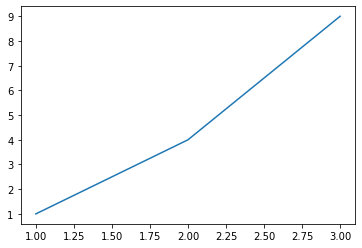

In [7]:
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x,y)

If the points are represented as a list-of-lists, you may need to slice to grab the first column's x coordinates and the second column's y coordinates.

[[2 1]
 [3 4]
 [5 6]]


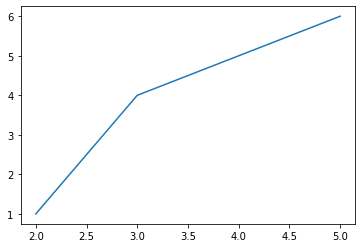

In [8]:
my_points = np.array([[2,1], [3,4], [5,6]]) # Each list is a point
print(my_points)
plt.plot(my_points[:,0], my_points[:,1])    # Slice to get x values separate from y values

A scatterplot is achievable with plt.plot() by just handing it an 'o' (lowercase o) as a third argument.  You can also hand it a color abbreviation as part of the same string to plot in a different color.

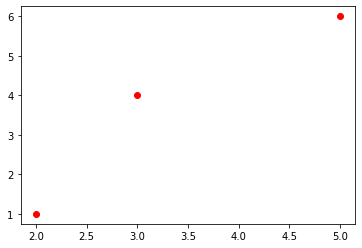

In [9]:
plt.plot(my_points[:,0], my_points[:,1],'ro') # 'r' is for red, 'o' is for circles

If want to plot smooth lines for a curved function, we'd probably want to evaluate at a lot of points.  matplotlib connects them with straight lines, but if they're close together, we get an illusion of a smooth curve.

np.linspace(begin,end,points) spaces *points* points evenly between *begin* and *end*.  If we pick a *points* value large enough, we can make a line graph that looks as though it curves.

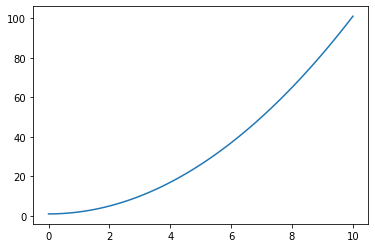

In [10]:
xpoints = np.linspace(0, 10,100)
ypoints = xpoints ** 2 + 1
plt.plot(xpoints,ypoints)

You might notice something strange about this graph:  a graph of $x^2 + 1$ should show a much steeper increase. The axes aren't on the same scale.

Autoscaling to fit the box is the norm for plt.plot(), resulting in the less steep increase of $x^2$ in the previous example.  Let's try setting plt.autoscale(False) beforehand, along with better limits, to get a better sense of the data.

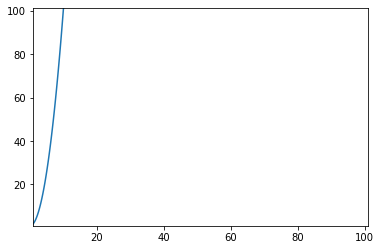

In [11]:
plt.autoscale(False)
plt.xlim(min(ypoints),max(ypoints))
plt.ylim(min(ypoints),max(ypoints)) # Same limits to avoid stretch
plt.plot(xpoints,ypoints)

You can plot multiple plots on top of each other, such as the raw scatter data as well as a fit, by just plotting in the same code box.

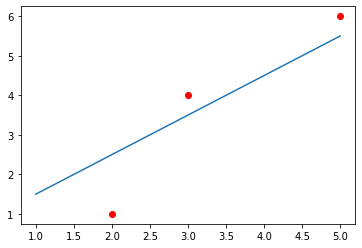

In [12]:
plt.plot(my_points[:,0], my_points[:,1],'ro')
myfit_x = np.linspace(1,5,100)
myfit_y = np.linspace(1.5, 5.5, 100)
plt.plot(myfit_x,myfit_y)

# 3D scatterplots and curves

We can also make 3D plots with matplotlib.  This requires some boilerplate to set up a 3D drawing surface, followed by a scatter() call that is passed x, y, and z coordinates, similar to plt.plot().


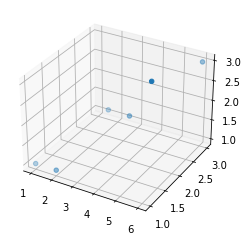

In [13]:
# Boilerplate to set up ax
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = [1, 2, 3, 4, 5, 6]
y = [1, 1, 2, 2, 2, 3]
z = [1, 1, 2, 2, 3, 3]
ax.scatter(x,y,z)


The next bit of 3D plotting requires np.meshgrid().  Given two arrays, one for x values and one for y values, np.meshgrid returns the x and y coordinates of all points on a 2D grid with those values.  For example:

In [14]:
x = [1, 2, 3]
y = [10, 20, 30]

xx, yy = np.meshgrid(x,y)
# Produces (1,10), (2,10), (3,10), (1,20), ... (3, 30)
# but separated into x and y components
print(xx)
print(yy)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]
 [30 30 30]]


If you're actually plotting some function z = f(x,y), np.meshgrid() will create all the combinations of x and y necessary to evaluate the function on a grid.

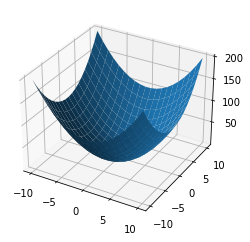

In [15]:
# Plot x^2 + y^2
x = np.linspace(-10,10,20)
y = np.linspace(-10,10,20)
xx, yy = np.meshgrid(x,y)  # Creates appropriate lists of x coords, y coords
zz = xx ** 2 + yy ** 2 # They're each 1d lists, so zz is as well; ** is power

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,zz)

As with numpy, there are many more functions in matplotlib, and even more functionality we haven't explored with the plotting functions we did see.  Googling how to do new things is normal and healthy.

# Exercise

Make up some time series data for yourself over the last 5 years, like "books read" or "hours of free time per week."  You should make mock data for years 2016, 2017, 2018, 2019, and 2020.  Plot your datapoints as both scatterplot and line plot.

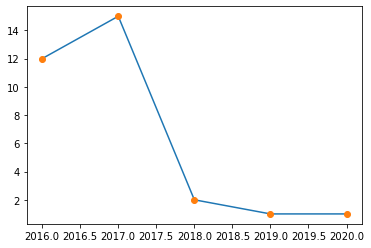

In [18]:
years = [2016, 2017, 2018, 2019, 2020]
books_read = [12, 15, 2, 1, 1]
plt.plot(years, books_read)
plt.plot(years, books_read, 'o')